In [126]:
using Plots, CSV, StatPlots, DataFrames

In [75]:
gr(size=(800,500));

<h3>Data</h3>

In [162]:
data = CSV.read("./pwt90.csv");

<h1>Part I - National Accounts</h1>
<h3>a) Build a 100% Stacked Column graph with the shares of GDP decomposed by the
Expenditure Approach and a line graph with the GDP evolution for the country assigned to
your group, for 1990, 1995, 2000, 2005, 2010 and 2014.</h3>

In [6]:
BDI = data[data[:countrycode] .== "BDI", :];

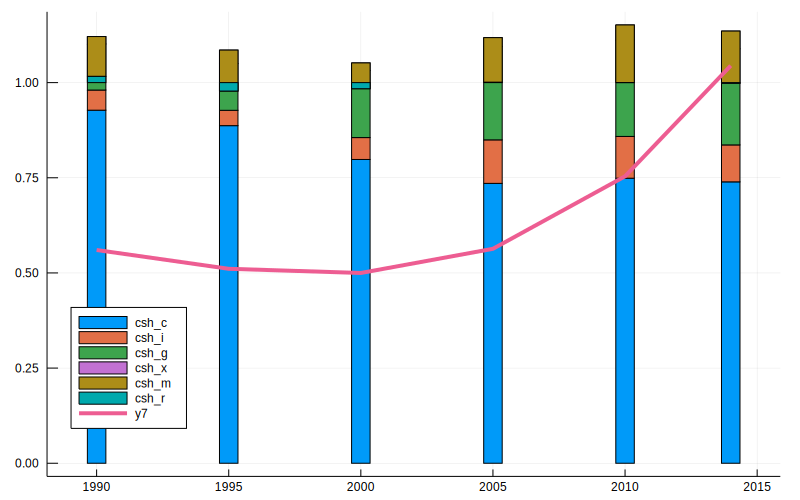

In [92]:
@df BDI groupedbar(:year, [:csh_c :csh_i :csh_g :csh_x :csh_m :csh_r], bar_position = :stack, bar_width=0.7)
@df BDI plot!(:year, :rgdpe/8000, legend=:bottomleft, linewidth=4)

<h3>b) Compute the growth of each component of the expenditure approach and the growth rate
of GDP for 1990-1995, 1995-2000, 2000-2005, 2005-2010, 2010-2014. What is the long-term
growth rate?</h3>

In [242]:
BDI_csh = convert(Array, BDI[[:year, :csh_c, :csh_i, :csh_g, :csh_x, :csh_m, :rgdpe]])
table_growth = zeros(size(BDI_csh)[1]-1,size(BDI_csh)[2])

for t in 1:size(BDI_csh,1)-1 
    table_growth[t,:] = ((BDI_csh[t+1,:]./BDI_csh[t,:]).-1).*100 
end

table_growth[:,1] = BDI_csh[2:end,1]
BDI_p1 = DataFrame(table_growth, [:period, :csh_c, :csh_i, :csh_g, :csh_x, :csh_m, :rgdpe])

,period,csh_c,csh_i,csh_g,csh_x,csh_m,rgdpe
1,1995.0,-4.3795,-23.7895,1.35887,82.5536,2.89576,-8.81038
2,2000.0,-10.0158,42.5914,43.5424,-43.789,-37.0026,-2.14511
3,2005.0,-7.87065,98.82,39.0903,17.7741,73.0331,12.714
4,2010.0,1.84283,-3.97134,3.45177,67.5108,29.091,33.8058
5,2014.0,-1.27663,-11.578,-0.424966,18.5581,-9.48564,38.5443


$$ g_{1990-2014} = \left( \left(\frac{Y_{2014}}{Y_{1990}}\right)^{\frac{1}{2014-1990+1}} -1 \right)\cdot100$$

In [243]:
print(((BDI_csh[:,end][end]/BDI_csh[:,end][1]).^(1/(BDI_csh[:,1][end]-BDI_csh[:,1][1]+1))-1)*100, " %")

2.5233465530431376 %

<h3> c) Compare the growth rates of each component with the respective share in the GDP and
with the growth rate of GDP. What do you think is the component that contributes the most
for economic growth? </h3>

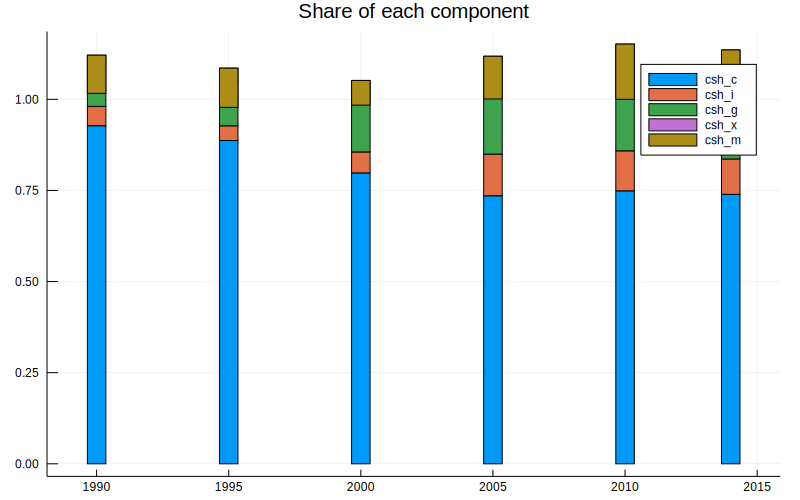

In [272]:
@df BDI groupedbar(:year, [:csh_c :csh_i :csh_g :csh_x :csh_m], bar_position = :stack, bar_width=0.7,title="Share of each component")

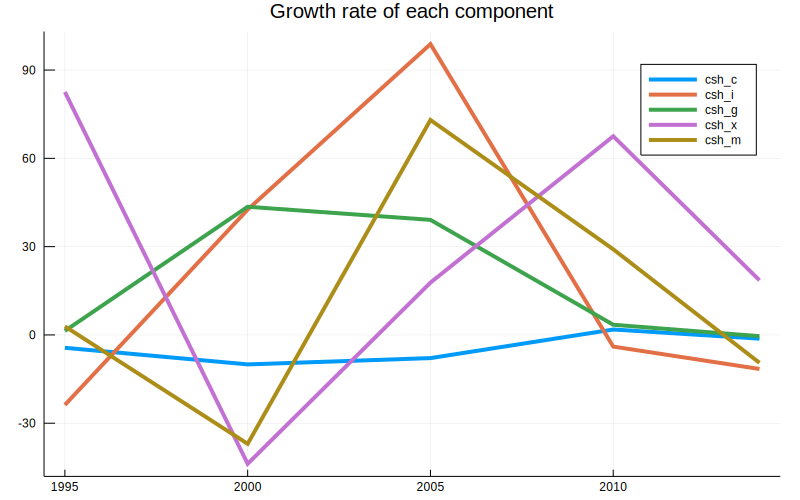

In [271]:
@df BDI_p1 plot(:period, [:csh_c :csh_i :csh_g :csh_x :csh_m], linewidth=4, title="Growth rate of each component")

<h1>Part II – Economic Growth</h1>
<h3>The Solow Growth Model can be summarized by two fundamental equations:</h3>
$$ Y = A\cdot F(K,L) $$
$$ \frac{\Delta k}{k} = s\cdot A \cdot \frac{f(k)}{k} - (s\cdot \delta + n) = s\cdot A \cdot k^{\alpha-1} - (s\cdot \delta + n) $$
<h3>For this exercise assume a Cobb-Douglas production function: </h3> 
$$F(K,L) = K^\alpha \cdot L^{1-\alpha}$$
<h3>a) What is the economic interpretation for $\alpha$? How would you measure $\alpha$ using national
accounts data?</h3> 


$\alpha$ represents the share of income that is used to pay for capital.

<h3>b) Using output-per-worker ($y$), capital per worker ($k$) and the parameter $\alpha$, compute the TFP of Norway and of your country, for 1990, 1995, 2000, 2005, 2010 and 2014.</h3>

$$ y= TFP \cdot k^\alpha \iff TFP = \frac{y}{k^\alpha}$$

In [246]:
NOR_p2 = data[data[:countrycode] .== "NOR", :][[:year, :emp, :rkna, :labsh, :rgdpo]]
NOR_p2[:y] = NOR_p2[:rgdpo]./NOR_p2[:emp]
NOR_p2[:k] = NOR_p2[:rkna]./NOR_p2[:emp]
NOR_p2[:tfp] = NOR_p2[:y]./(NOR_p2[:k].^(-NOR_p2[:labsh].+1))

BDI_p2 = data[data[:countrycode] .== "BDI", :][[:year, :emp, :rkna, :labsh, :rgdpo]]
BDI_p2[:y] = BDI_p2[:rgdpo]./BDI_p2[:emp]
BDI_p2[:k] = BDI_p2[:rkna]./BDI_p2[:emp]
BDI_p2[:tfp] = BDI_p2[:y]./(BDI_p2[:k].^(-BDI_p2[:labsh].+1));

In [247]:
NOR_p2

,year,emp,rkna,labsh,rgdpo,y,k,tfp
1,1990,2.05821,6.55253e5,0.590032,1.23668e5,60085.2,3.18361e5,333.231
2,1995,2.12033,7.06682e5,0.583873,1.45568e5,68653.3,3.33288e5,345.513
3,2000,2.31957,8.2295e5,0.514497,2.26723e5,97743.5,3.54785e5,197.498
4,2005,2.35375,9.27919e5,0.486132,3.1134e5,1.32274e5,3.9423e5,176.196
5,2010,2.59097,1.08989e6,0.52836,3.59414e5,1.38718e5,4.2065e5,308.792
6,2014,2.7481,1.21841e6,0.533614,4.03049e5,146665.0,4.43365e5,341.002


In [248]:
BDI_p2

,year,emp,rkna,labsh,rgdpo,y,k,tfp
1,1990,2.61301,6870.94,0.726544,4906.63,1877.77,2629.52,218.0
2,1995,2.72595,6691.77,0.763355,4472.66,1640.77,2454.84,258.71
3,2000,2.87759,6891.95,0.800165,4383.61,1523.36,2395.04,321.736
4,2005,3.53464,7772.67,0.836976,5067.9,1433.78,2199.0,408.903
5,2010,4.31908,9271.11,0.608643,6477.21,1499.67,2146.55,74.4898
6,2014,4.92557,11950.4,0.608643,9108.82,1849.29,2426.19,87.5572


<h3>c) Is your country converging with Norway? What can be a possible explanation for that
behaviour? (Tip: Think in the determinants of the steady state) </h3>

$ \text{Key equation (determinants of the steady state):} $
$$ k^\star =  k^\star[s,A,n,\delta, L(0)]$$


$ \text{Key equation (conditional convergence for real GDP per worker):} $
$$ \Delta y/y =  \Phi[y(0), y^\star]$$

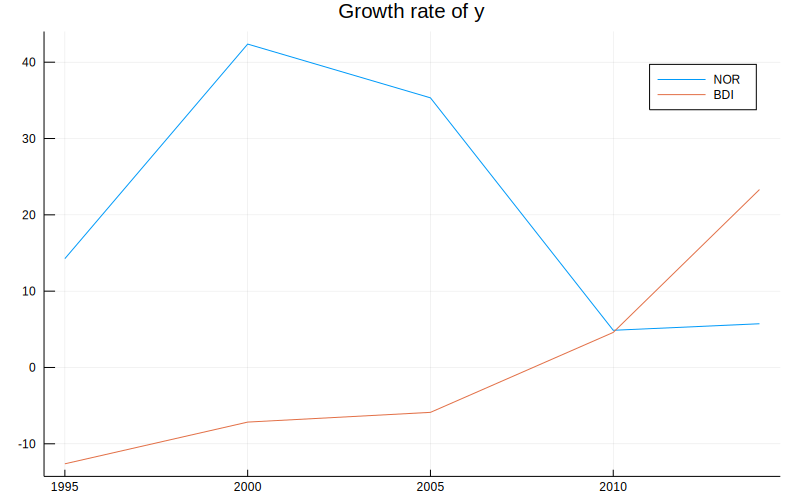

In [268]:
NOR_Δy_y = ((NOR_p2[:y][2:end]./NOR_p2[:y][1:end-1]).-1)*100
BDI_Δy_y = ((BDI_p2[:y][2:end]./BDI_p2[:y][1:end-1]).-1)*100
plot(BDI_p2[:year][2:end], [NOR_Δy_y BDI_Δy_y], label = ["NOR", "BDI"], title="Growth rate of y")